In [3]:
import astropy
print(astropy.__version__)
from astropy.visualization import quantity_support
quantity_support()

4.0.1.post1


<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x116754e10>

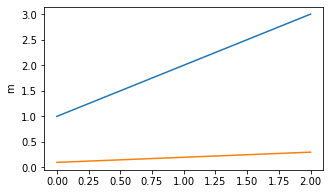

In [7]:
from astropy import units as u
from matplotlib import pyplot as plt
plt.figure(figsize=(5,3))
plt.plot([1, 2, 3] * u.m)
plt.plot([1, 2, 3] * u.cm * 10)

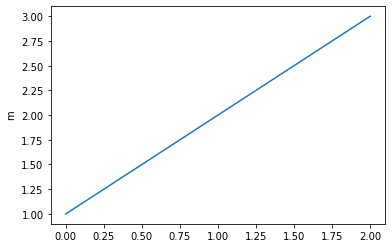

In [8]:
with quantity_support():
    plt.plot([1, 2, 3] * u.m)

https://docs.astropy.org/en/stable/_modules/astropy/visualization/units.html#quantity_support


## Plotting axhline without setting context

UnitConversionError: Can only apply 'less' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

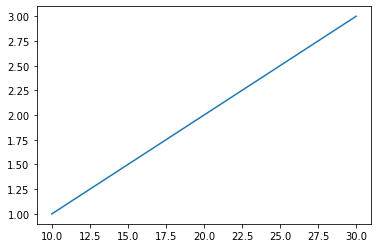

In [1]:
from astropy import units as u
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
x = [1, 2, 3] * u.cm * 10
y = [1, 2, 3] * u.cm 
ax.plot(x, y, 'tab:blue')
ax.axhline(0.02 * u.cm , color='tab:red')
ax.axvline(500* u.cm , color='tab:green')

# Equivalencies

 - https://docs.astropy.org/en/stable/units/equivalencies.html
 - https://docs.astropy.org/en/stable/_modules/astropy/units/equivalencies.html#temperature
 - https://docs.astropy.org/en/stable/_modules/astropy/units/equivalencies.html

In [2]:
from astropy import units as u
# this will fail : 
# (0.8 * u.arcsec).to(u.parsec)  
(0.8 * u.arcsec).to(u.parsec, equivalencies=u.parallax())

<Quantity 1.25 pc>

In [2]:
import astropy.units as u

liters_water = [
    (u.l, u.g, lambda x: 1000.0 * x, lambda x: x / 1000.0)
]
u.l.to(u.kg, 1, equivalencies=liters_water)

1.0

In [3]:
u.deg.to('', equivalencies=u.dimensionless_angles())  

0.017453292519943295

In [4]:
(0.5e38 * u.kg * u.m**2 * (u.cycle / u.s)**2).to(u.J,

                           equivalencies=u.dimensionless_angles())  

<Quantity 1.97392088e+39 J>

In [6]:
import numpy as np
np.exp((1j*0.125*u.cycle).to('', equivalencies=u.dimensionless_angles()))  

<Quantity 0.70710678+0.70710678j>

In [7]:
(1*u.rad/u.s).to(u.Hz, equivalencies=[(u.cy/u.s, u.Hz)]) 

<Quantity 0.15915494 Hz>

In [8]:
([1000, 2000] * u.nm).to(u.Hz, equivalencies=u.spectral())  

<Quantity [2.99792458e+14, 1.49896229e+14] Hz>

In [11]:
u.spectral?

Signature: u.spectral()
Docstring:
Returns a list of equivalence pairs that handle spectral
wavelength, wave number, frequency, and energy equivalences.

Allows conversions between wavelength units, wave number units,
frequency units, and energy units as they relate to light.

There are two types of wave number:

    * spectroscopic - :math:`1 / \lambda` (per meter)
    * angular - :math:`2 \pi / \lambda` (radian per meter)
File:      /opt/anaconda3/lib/python3.7/site-packages/astropy/units/equivalencies.py
Type:      function


In [12]:
(1.5 * u.Jy).to(u.photon / u.cm**2 / u.s / u.Hz,
                 equivalencies=u.spectral_density(3500 * u.AA)) 

<Quantity 2.6429112e-12 ph / (cm2 Hz s)>

In [15]:
u.photon

Unit("ph")

In [16]:
dpi = u.pixel_scale(100 * u.pix / u.imperial.inch)
(1024 * u.pix).to(u.cm, dpi)  

UnitsError: The pixel scale must be in angle/pixel or pixel/angle

In [17]:
temp_C = 0 * u.Celsius
temp_Kelvin = temp_C.to(u.K, equivalencies=u.temperature())
temp_Kelvin  

<Quantity 273.15 K>

In [19]:
temp_F = temp_C.to(u.imperial.deg_F, equivalencies=u.temperature())
temp_F

<Quantity 32. deg_F>

In [20]:
liters_water = [
   (u.l, u.g, lambda x: 1000.0 * x, lambda x: x / 1000.0)
]
u.l.to(u.kg, 1, equivalencies=liters_water)

1.0

In [21]:
u.Hz.find_equivalent_units()

Primary name,Unit definition,Aliases
Bq,1 / s,becquerel
Ci,3.7e+10 / s,curie
Hz,1 / s,"Hertz, hertz"


In [22]:
u.set_enabled_equivalencies(u.dimensionless_angles())
u.deg.to('')  

0.017453292519943295

In [23]:
with u.set_enabled_equivalencies(u.dimensionless_angles()):
    phase = 0.5 * u.cycle
    c = np.exp(1j*phase)
c  

<Quantity -1.+1.2246468e-16j>

In [ ]:


[docs]
def dimensionless_angles():
    """Allow angles to be equivalent to dimensionless (with 1 rad = 1 m/m = 1).

    It is special compared to other equivalency pairs in that it
    allows this independent of the power to which the angle is raised,
    and independent of whether it is part of a more complicated unit.
    """
    return Equivalency([(si.radian, None)], "dimensionless_angles")



[docs]
def logarithmic():
    """Allow logarithmic units to be converted to dimensionless fractions"""
    return Equivalency([
        (dimensionless_unscaled, function_units.dex,
         np.log10, lambda x: 10.**x)
    ], "logarithmic")



[docs]
def parallax():
    """
    Returns a list of equivalence pairs that handle the conversion
    between parallax angle and distance.
    """

    def parallax_converter(x):
        x = np.asanyarray(x)
        d = 1 / x

        if isiterable(d):
            d[d < 0] = np.nan
            return d

        else:
            if d < 0:
                return np.array(np.nan)
            else:
                return d

    return Equivalency([
        (si.arcsecond, astrophys.parsec, parallax_converter)
    ], "parallax")



[docs]
def spectral():
    """
    Returns a list of equivalence pairs that handle spectral
    wavelength, wave number, frequency, and energy equivalences.

    Allows conversions between wavelength units, wave number units,
    frequency units, and energy units as they relate to light.

    There are two types of wave number:

        * spectroscopic - :math:`1 / \\lambda` (per meter)
        * angular - :math:`2 \\pi / \\lambda` (radian per meter)

    """
    hc = _si.h.value * _si.c.value
    two_pi = 2.0 * np.pi
    inv_m_spec = si.m ** -1
    inv_m_ang = si.radian / si.m

    return Equivalency([
        (si.m, si.Hz, lambda x: _si.c.value / x),
        (si.m, si.J, lambda x: hc / x),
        (si.Hz, si.J, lambda x: _si.h.value * x, lambda x: x / _si.h.value),
        (si.m, inv_m_spec, lambda x: 1.0 / x),
        (si.Hz, inv_m_spec, lambda x: x / _si.c.value,
         lambda x: _si.c.value * x),
        (si.J, inv_m_spec, lambda x: x / hc, lambda x: hc * x),
        (inv_m_spec, inv_m_ang, lambda x: x * two_pi, lambda x: x / two_pi),
        (si.m, inv_m_ang, lambda x: two_pi / x),
        (si.Hz, inv_m_ang, lambda x: two_pi * x / _si.c.value,
         lambda x: _si.c.value * x / two_pi),
        (si.J, inv_m_ang, lambda x: x * two_pi / hc, lambda x: hc * x / two_pi)
    ], "spectral")



[docs]
def spectral_density(wav, factor=None):
    """
    Returns a list of equivalence pairs that handle spectral density
    with regard to wavelength and frequency.

    Parameters
    ----------
    wav : `~astropy.units.Quantity`
        `~astropy.units.Quantity` associated with values being converted
        (e.g., wavelength or frequency).

    Notes
    -----
    The ``factor`` argument is left for backward-compatibility with the syntax
    ``spectral_density(unit, factor)`` but users are encouraged to use
    ``spectral_density(factor * unit)`` instead.

    """
    from .core import UnitBase

    if isinstance(wav, UnitBase):
        if factor is None:
            raise ValueError(
                'If `wav` is specified as a unit, `factor` should be set')
        wav = factor * wav   # Convert to Quantity
    c_Aps = _si.c.to_value(si.AA / si.s)  # Angstrom/s
    h_cgs = _si.h.cgs.value  # erg * s
    hc = c_Aps * h_cgs

    # flux density
    f_la = cgs.erg / si.angstrom / si.cm ** 2 / si.s
    f_nu = cgs.erg / si.Hz / si.cm ** 2 / si.s
    nu_f_nu = cgs.erg / si.cm ** 2 / si.s
    la_f_la = nu_f_nu
    phot_f_la = astrophys.photon / (si.cm ** 2 * si.s * si.AA)
    phot_f_nu = astrophys.photon / (si.cm ** 2 * si.s * si.Hz)
    la_phot_f_la = astrophys.photon / (si.cm ** 2 * si.s)

    # luminosity density
    L_nu = cgs.erg / si.s / si.Hz
    L_la = cgs.erg / si.s / si.angstrom
    nu_L_nu = cgs.erg / si.s
    la_L_la = nu_L_nu
    phot_L_la = astrophys.photon / (si.s * si.AA)
    phot_L_nu = astrophys.photon / (si.s * si.Hz)

    # surface brigthness (flux equiv)
    S_la = cgs.erg / si.angstrom / si.cm ** 2 / si.s / si.sr
    S_nu = cgs.erg / si.Hz / si.cm ** 2 / si.s / si.sr
    nu_S_nu = cgs.erg / si.cm ** 2 / si.s / si.sr
    la_S_la = nu_S_nu
    phot_S_la = astrophys.photon / (si.cm ** 2 * si.s * si.AA * si.sr)
    phot_S_nu = astrophys.photon / (si.cm ** 2 * si.s * si.Hz * si.sr)

    # surface brightness (luminosity equiv)
    SL_nu = cgs.erg / si.s / si.Hz / si.sr
    SL_la = cgs.erg / si.s / si.angstrom / si.sr
    nu_SL_nu = cgs.erg / si.s / si.sr
    la_SL_la = nu_SL_nu
    phot_SL_la = astrophys.photon / (si.s * si.AA * si.sr)
    phot_SL_nu = astrophys.photon / (si.s * si.Hz * si.sr)

    def converter(x):
        return x * (wav.to_value(si.AA, spectral()) ** 2 / c_Aps)

    def iconverter(x):
        return x / (wav.to_value(si.AA, spectral()) ** 2 / c_Aps)

    def converter_f_nu_to_nu_f_nu(x):
        return x * wav.to_value(si.Hz, spectral())

    def iconverter_f_nu_to_nu_f_nu(x):
        return x / wav.to_value(si.Hz, spectral())

    def converter_f_la_to_la_f_la(x):
        return x * wav.to_value(si.AA, spectral())

    def iconverter_f_la_to_la_f_la(x):
        return x / wav.to_value(si.AA, spectral())

    def converter_phot_f_la_to_f_la(x):
        return hc * x / wav.to_value(si.AA, spectral())

    def iconverter_phot_f_la_to_f_la(x):
        return x * wav.to_value(si.AA, spectral()) / hc

    def converter_phot_f_la_to_f_nu(x):
        return h_cgs * x * wav.to_value(si.AA, spectral())

    def iconverter_phot_f_la_to_f_nu(x):
        return x / (wav.to_value(si.AA, spectral()) * h_cgs)

    def converter_phot_f_la_phot_f_nu(x):
        return x * wav.to_value(si.AA, spectral()) ** 2 / c_Aps

    def iconverter_phot_f_la_phot_f_nu(x):
        return c_Aps * x / wav.to_value(si.AA, spectral()) ** 2

    converter_phot_f_nu_to_f_nu = converter_phot_f_la_to_f_la
    iconverter_phot_f_nu_to_f_nu = iconverter_phot_f_la_to_f_la

    def converter_phot_f_nu_to_f_la(x):
        return x * hc * c_Aps / wav.to_value(si.AA, spectral()) ** 3

    def iconverter_phot_f_nu_to_f_la(x):
        return x * wav.to_value(si.AA, spectral()) ** 3 / (hc * c_Aps)

    # for luminosity density
    converter_L_nu_to_nu_L_nu = converter_f_nu_to_nu_f_nu
    iconverter_L_nu_to_nu_L_nu = iconverter_f_nu_to_nu_f_nu
    converter_L_la_to_la_L_la = converter_f_la_to_la_f_la
    iconverter_L_la_to_la_L_la = iconverter_f_la_to_la_f_la

    converter_phot_L_la_to_L_la = converter_phot_f_la_to_f_la
    iconverter_phot_L_la_to_L_la = iconverter_phot_f_la_to_f_la
    converter_phot_L_la_to_L_nu = converter_phot_f_la_to_f_nu
    iconverter_phot_L_la_to_L_nu = iconverter_phot_f_la_to_f_nu
    converter_phot_L_la_phot_L_nu = converter_phot_f_la_phot_f_nu
    iconverter_phot_L_la_phot_L_nu = iconverter_phot_f_la_phot_f_nu
    converter_phot_L_nu_to_L_nu = converter_phot_f_nu_to_f_nu
    iconverter_phot_L_nu_to_L_nu = iconverter_phot_f_nu_to_f_nu
    converter_phot_L_nu_to_L_la = converter_phot_f_nu_to_f_la
    iconverter_phot_L_nu_to_L_la = iconverter_phot_f_nu_to_f_la

    return Equivalency([
        # flux
        (f_la, f_nu, converter, iconverter),
        (f_nu, nu_f_nu, converter_f_nu_to_nu_f_nu, iconverter_f_nu_to_nu_f_nu),
        (f_la, la_f_la, converter_f_la_to_la_f_la, iconverter_f_la_to_la_f_la),
        (phot_f_la, f_la, converter_phot_f_la_to_f_la, iconverter_phot_f_la_to_f_la),
        (phot_f_la, f_nu, converter_phot_f_la_to_f_nu, iconverter_phot_f_la_to_f_nu),
        (phot_f_la, phot_f_nu, converter_phot_f_la_phot_f_nu, iconverter_phot_f_la_phot_f_nu),
        (phot_f_nu, f_nu, converter_phot_f_nu_to_f_nu, iconverter_phot_f_nu_to_f_nu),
        (phot_f_nu, f_la, converter_phot_f_nu_to_f_la, iconverter_phot_f_nu_to_f_la),
        # integrated flux
        (la_phot_f_la, la_f_la, converter_phot_f_la_to_f_la, iconverter_phot_f_la_to_f_la),
        # luminosity
        (L_la, L_nu, converter, iconverter),
        (L_nu, nu_L_nu, converter_L_nu_to_nu_L_nu, iconverter_L_nu_to_nu_L_nu),
        (L_la, la_L_la, converter_L_la_to_la_L_la, iconverter_L_la_to_la_L_la),
        (phot_L_la, L_la, converter_phot_L_la_to_L_la, iconverter_phot_L_la_to_L_la),
        (phot_L_la, L_nu, converter_phot_L_la_to_L_nu, iconverter_phot_L_la_to_L_nu),
        (phot_L_la, phot_L_nu, converter_phot_L_la_phot_L_nu, iconverter_phot_L_la_phot_L_nu),
        (phot_L_nu, L_nu, converter_phot_L_nu_to_L_nu, iconverter_phot_L_nu_to_L_nu),
        (phot_L_nu, L_la, converter_phot_L_nu_to_L_la, iconverter_phot_L_nu_to_L_la),
        # surface brightness (flux equiv)
        (S_la, S_nu, converter, iconverter),
        (S_nu, nu_S_nu, converter_f_nu_to_nu_f_nu, iconverter_f_nu_to_nu_f_nu),
        (S_la, la_S_la, converter_f_la_to_la_f_la, iconverter_f_la_to_la_f_la),
        (phot_S_la, S_la, converter_phot_f_la_to_f_la, iconverter_phot_f_la_to_f_la),
        (phot_S_la, S_nu, converter_phot_f_la_to_f_nu, iconverter_phot_f_la_to_f_nu),
        (phot_S_la, phot_S_nu, converter_phot_f_la_phot_f_nu, iconverter_phot_f_la_phot_f_nu),
        (phot_S_nu, S_nu, converter_phot_f_nu_to_f_nu, iconverter_phot_f_nu_to_f_nu),
        (phot_S_nu, S_la, converter_phot_f_nu_to_f_la, iconverter_phot_f_nu_to_f_la),
        # surface brightness (luminosity equiv)
        (SL_la, SL_nu, converter, iconverter),
        (SL_nu, nu_SL_nu, converter_L_nu_to_nu_L_nu, iconverter_L_nu_to_nu_L_nu),
        (SL_la, la_SL_la, converter_L_la_to_la_L_la, iconverter_L_la_to_la_L_la),
        (phot_SL_la, SL_la, converter_phot_L_la_to_L_la, iconverter_phot_L_la_to_L_la),
        (phot_SL_la, SL_nu, converter_phot_L_la_to_L_nu, iconverter_phot_L_la_to_L_nu),
        (phot_SL_la, phot_SL_nu, converter_phot_L_la_phot_L_nu, iconverter_phot_L_la_phot_L_nu),
        (phot_SL_nu, SL_nu, converter_phot_L_nu_to_L_nu, iconverter_phot_L_nu_to_L_nu),
        (phot_SL_nu, SL_la, converter_phot_L_nu_to_L_la, iconverter_phot_L_nu_to_L_la),
    ], "spectral_density", {'wav': wav, 'factor': factor})



[docs]
def doppler_radio(rest):
    r"""
    Return the equivalency pairs for the radio convention for velocity.

    The radio convention for the relation between velocity and frequency is:

    :math:`V = c \frac{f_0 - f}{f_0}  ;  f(V) = f_0 ( 1 - V/c )`

    Parameters
    ----------
    rest : `~astropy.units.Quantity`
        Any quantity supported by the standard spectral equivalencies
        (wavelength, energy, frequency, wave number).

    References
    ----------
    `NRAO site defining the conventions <https://www.gb.nrao.edu/~fghigo/gbtdoc/doppler.html>`_

    Examples
    --------
    >>> import astropy.units as u
    >>> CO_restfreq = 115.27120*u.GHz  # rest frequency of 12 CO 1-0 in GHz
    >>> radio_CO_equiv = u.doppler_radio(CO_restfreq)
    >>> measured_freq = 115.2832*u.GHz
    >>> radio_velocity = measured_freq.to(u.km/u.s, equivalencies=radio_CO_equiv)
    >>> radio_velocity  # doctest: +FLOAT_CMP
    <Quantity -31.209092088877583 km / s>
    """

    assert_is_spectral_unit(rest)

    ckms = _si.c.to_value('km/s')

    def to_vel_freq(x):
        restfreq = rest.to_value(si.Hz, equivalencies=spectral())
        return (restfreq-x) / (restfreq) * ckms

    def from_vel_freq(x):
        restfreq = rest.to_value(si.Hz, equivalencies=spectral())
        voverc = x/ckms
        return restfreq * (1-voverc)

    def to_vel_wav(x):
        restwav = rest.to_value(si.AA, spectral())
        return (x-restwav) / (x) * ckms

    def from_vel_wav(x):
        restwav = rest.to_value(si.AA, spectral())
        return restwav * ckms / (ckms-x)

    def to_vel_en(x):
        resten = rest.to_value(si.eV, equivalencies=spectral())
        return (resten-x) / (resten) * ckms

    def from_vel_en(x):
        resten = rest.to_value(si.eV, equivalencies=spectral())
        voverc = x/ckms
        return resten * (1-voverc)

    return Equivalency([(si.Hz, si.km/si.s, to_vel_freq, from_vel_freq),
            (si.AA, si.km/si.s, to_vel_wav, from_vel_wav),
            (si.eV, si.km/si.s, to_vel_en, from_vel_en),
            ], "doppler_radio", {'rest': rest})



[docs]
def doppler_optical(rest):
    r"""
    Return the equivalency pairs for the optical convention for velocity.

    The optical convention for the relation between velocity and frequency is:

    :math:`V = c \frac{f_0 - f}{f  }  ;  f(V) = f_0 ( 1 + V/c )^{-1}`

    Parameters
    ----------
    rest : `~astropy.units.Quantity`
        Any quantity supported by the standard spectral equivalencies
        (wavelength, energy, frequency, wave number).

    References
    ----------
    `NRAO site defining the conventions <https://www.gb.nrao.edu/~fghigo/gbtdoc/doppler.html>`_

    Examples
    --------
    >>> import astropy.units as u
    >>> CO_restfreq = 115.27120*u.GHz  # rest frequency of 12 CO 1-0 in GHz
    >>> optical_CO_equiv = u.doppler_optical(CO_restfreq)
    >>> measured_freq = 115.2832*u.GHz
    >>> optical_velocity = measured_freq.to(u.km/u.s, equivalencies=optical_CO_equiv)
    >>> optical_velocity  # doctest: +FLOAT_CMP
    <Quantity -31.20584348799674 km / s>
    """

    assert_is_spectral_unit(rest)

    ckms = _si.c.to_value('km/s')

    def to_vel_freq(x):
        restfreq = rest.to_value(si.Hz, equivalencies=spectral())
        return ckms * (restfreq-x) / x

    def from_vel_freq(x):
        restfreq = rest.to_value(si.Hz, equivalencies=spectral())
        voverc = x/ckms
        return restfreq / (1+voverc)

    def to_vel_wav(x):
        restwav = rest.to_value(si.AA, spectral())
        return ckms * (x/restwav-1)

    def from_vel_wav(x):
        restwav = rest.to_value(si.AA, spectral())
        voverc = x/ckms
        return restwav * (1+voverc)

    def to_vel_en(x):
        resten = rest.to_value(si.eV, equivalencies=spectral())
        return ckms * (resten-x) / x

    def from_vel_en(x):
        resten = rest.to_value(si.eV, equivalencies=spectral())
        voverc = x/ckms
        return resten / (1+voverc)

    return Equivalency([(si.Hz, si.km/si.s, to_vel_freq, from_vel_freq),
            (si.AA, si.km/si.s, to_vel_wav, from_vel_wav),
            (si.eV, si.km/si.s, to_vel_en, from_vel_en),
            ], "doppler_optical", {'rest': rest})



[docs]
def doppler_relativistic(rest):
    r"""
    Return the equivalency pairs for the relativistic convention for velocity.

    The full relativistic convention for the relation between velocity and frequency is:

    :math:`V = c \frac{f_0^2 - f^2}{f_0^2 + f^2} ;  f(V) = f_0 \frac{\left(1 - (V/c)^2\right)^{1/2}}{(1+V/c)}`

    Parameters
    ----------
    rest : `~astropy.units.Quantity`
        Any quantity supported by the standard spectral equivalencies
        (wavelength, energy, frequency, wave number).

    References
    ----------
    `NRAO site defining the conventions <https://www.gb.nrao.edu/~fghigo/gbtdoc/doppler.html>`_

    Examples
    --------
    >>> import astropy.units as u
    >>> CO_restfreq = 115.27120*u.GHz  # rest frequency of 12 CO 1-0 in GHz
    >>> relativistic_CO_equiv = u.doppler_relativistic(CO_restfreq)
    >>> measured_freq = 115.2832*u.GHz
    >>> relativistic_velocity = measured_freq.to(u.km/u.s, equivalencies=relativistic_CO_equiv)
    >>> relativistic_velocity  # doctest: +FLOAT_CMP
    <Quantity -31.207467619351537 km / s>
    >>> measured_velocity = 1250 * u.km/u.s
    >>> relativistic_frequency = measured_velocity.to(u.GHz, equivalencies=relativistic_CO_equiv)
    >>> relativistic_frequency  # doctest: +FLOAT_CMP
    <Quantity 114.79156866993588 GHz>
    >>> relativistic_wavelength = measured_velocity.to(u.mm, equivalencies=relativistic_CO_equiv)
    >>> relativistic_wavelength  # doctest: +FLOAT_CMP
    <Quantity 2.6116243681798923 mm>
    """

    assert_is_spectral_unit(rest)

    ckms = _si.c.to_value('km/s')

    def to_vel_freq(x):
        restfreq = rest.to_value(si.Hz, equivalencies=spectral())
        return (restfreq**2-x**2) / (restfreq**2+x**2) * ckms

    def from_vel_freq(x):
        restfreq = rest.to_value(si.Hz, equivalencies=spectral())
        voverc = x/ckms
        return restfreq * ((1-voverc) / (1+(voverc)))**0.5

    def to_vel_wav(x):
        restwav = rest.to_value(si.AA, spectral())
        return (x**2-restwav**2) / (restwav**2+x**2) * ckms

    def from_vel_wav(x):
        restwav = rest.to_value(si.AA, spectral())
        voverc = x/ckms
        return restwav * ((1+voverc) / (1-voverc))**0.5

    def to_vel_en(x):
        resten = rest.to_value(si.eV, spectral())
        return (resten**2-x**2) / (resten**2+x**2) * ckms

    def from_vel_en(x):
        resten = rest.to_value(si.eV, spectral())
        voverc = x/ckms
        return resten * ((1-voverc) / (1+(voverc)))**0.5

    return Equivalency([(si.Hz, si.km/si.s, to_vel_freq, from_vel_freq),
            (si.AA, si.km/si.s, to_vel_wav, from_vel_wav),
            (si.eV, si.km/si.s, to_vel_en, from_vel_en),
            ], "doppler_relativistic", {'rest': rest})



[docs]
def molar_mass_amu():
    """
    Returns the equivalence between amu and molar mass.
    """
    return Equivalency([
        (si.g/si.mol, astrophys.u)
    ], "molar_mass_amu")



[docs]
def mass_energy():
    """
    Returns a list of equivalence pairs that handle the conversion
    between mass and energy.
    """

    return Equivalency([(si.kg, si.J, lambda x: x * _si.c.value ** 2,
             lambda x: x / _si.c.value ** 2),
            (si.kg / si.m ** 2, si.J / si.m ** 2,
             lambda x: x * _si.c.value ** 2,
             lambda x: x / _si.c.value ** 2),
            (si.kg / si.m ** 3, si.J / si.m ** 3,
             lambda x: x * _si.c.value ** 2,
             lambda x: x / _si.c.value ** 2),
            (si.kg / si.s, si.J / si.s, lambda x: x * _si.c.value ** 2,
             lambda x: x / _si.c.value ** 2),
    ], "mass_energy")



[docs]
def brightness_temperature(frequency, beam_area=None):
    r"""
    Defines the conversion between Jy/sr and "brightness temperature",
    :math:`T_B`, in Kelvins.  The brightness temperature is a unit very
    commonly used in radio astronomy.  See, e.g., "Tools of Radio Astronomy"
    (Wilson 2009) eqn 8.16 and eqn 8.19 (these pages are available on `google
    books
    <https://books.google.com/books?id=9KHw6R8rQEMC&pg=PA179&source=gbs_toc_r&cad=4#v=onepage&q&f=false>`__).

    :math:`T_B \equiv S_\nu / \left(2 k \nu^2 / c^2 \right)`

    If the input is in Jy/beam or Jy (assuming it came from a single beam), the
    beam area is essential for this computation: the brightness temperature is
    inversely proportional to the beam area.

    Parameters
    ----------
    frequency : `~astropy.units.Quantity` with spectral units
        The observed ``spectral`` equivalent `~astropy.units.Unit` (e.g.,
        frequency or wavelength).  The variable is named 'frequency' because it
        is more commonly used in radio astronomy.
        BACKWARD COMPATIBILITY NOTE: previous versions of the brightness
        temperature equivalency used the keyword ``disp``, which is no longer
        supported.
    beam_area : angular area equivalent
        Beam area in angular units, i.e. steradian equivalent

    Examples
    --------
    Arecibo C-band beam::

        >>> import numpy as np
        >>> from astropy import units as u
        >>> beam_sigma = 50*u.arcsec
        >>> beam_area = 2*np.pi*(beam_sigma)**2
        >>> freq = 5*u.GHz
        >>> equiv = u.brightness_temperature(freq)
        >>> (1*u.Jy/beam_area).to(u.K, equivalencies=equiv)  # doctest: +FLOAT_CMP
        <Quantity 3.526295144567176 K>

    VLA synthetic beam::

        >>> bmaj = 15*u.arcsec
        >>> bmin = 15*u.arcsec
        >>> fwhm_to_sigma = 1./(8*np.log(2))**0.5
        >>> beam_area = 2.*np.pi*(bmaj*bmin*fwhm_to_sigma**2)
        >>> freq = 5*u.GHz
        >>> equiv = u.brightness_temperature(freq)
        >>> (u.Jy/beam_area).to(u.K, equivalencies=equiv)  # doctest: +FLOAT_CMP
        <Quantity 217.2658703625732 K>

    Any generic surface brightness:

        >>> surf_brightness = 1e6*u.MJy/u.sr
        >>> surf_brightness.to(u.K, equivalencies=u.brightness_temperature(500*u.GHz)) # doctest: +FLOAT_CMP
        <Quantity 130.1931904778803 K>
    """
    if frequency.unit.is_equivalent(si.sr):
        if not beam_area.unit.is_equivalent(si.Hz):
            raise ValueError("The inputs to `brightness_temperature` are "
                             "frequency and angular area.")
        warnings.warn("The inputs to `brightness_temperature` have changed. "
                      "Frequency is now the first input, and angular area "
                      "is the second, optional input.",
                      AstropyDeprecationWarning)
        frequency, beam_area = beam_area, frequency

    nu = frequency.to(si.GHz, spectral())

    if beam_area is not None:
        beam = beam_area.to_value(si.sr)

        def convert_Jy_to_K(x_jybm):
            factor = (2 * _si.k_B * si.K * nu**2 / _si.c**2).to(astrophys.Jy).value
            return (x_jybm / beam / factor)

        def convert_K_to_Jy(x_K):
            factor = (astrophys.Jy / (2 * _si.k_B * nu**2 / _si.c**2)).to(si.K).value
            return (x_K * beam / factor)

        return Equivalency([(astrophys.Jy, si.K, convert_Jy_to_K, convert_K_to_Jy),
                            (astrophys.Jy/astrophys.beam, si.K, convert_Jy_to_K, convert_K_to_Jy),],
                           "brightness_temperature", {'frequency': frequency, 'beam_area': beam_area})
    else:
        def convert_JySr_to_K(x_jysr):
            factor = (2 * _si.k_B * si.K * nu**2 / _si.c**2).to(astrophys.Jy).value
            return (x_jysr / factor)

        def convert_K_to_JySr(x_K):
            factor = (astrophys.Jy / (2 * _si.k_B * nu**2 / _si.c**2)).to(si.K).value
            return (x_K / factor) # multiplied by 1x for 1 steradian

        return Equivalency([(astrophys.Jy/si.sr, si.K, convert_JySr_to_K, convert_K_to_JySr)],
                           "brightness_temperature", {'frequency': frequency, 'beam_area': beam_area})



[docs]
def beam_angular_area(beam_area):
    """
    Convert between the ``beam`` unit, which is commonly used to express the area
    of a radio telescope resolution element, and an area on the sky.
    This equivalency also supports direct conversion between ``Jy/beam`` and
    ``Jy/steradian`` units, since that is a common operation.

    Parameters
    ----------
    beam_area : angular area equivalent
        The area of the beam in angular area units (e.g., steradians)
    """
    return Equivalency([(astrophys.beam, Unit(beam_area)),
                        (astrophys.beam**-1, Unit(beam_area)**-1),
                        (astrophys.Jy/astrophys.beam, astrophys.Jy/Unit(beam_area)),],
                       "beam_angular_area", {'beam_area': beam_area})



[docs]
def thermodynamic_temperature(frequency, T_cmb=None):
    r"""Defines the conversion between Jy/sr and "thermodynamic temperature",
    :math:`T_{CMB}`, in Kelvins.  The thermodynamic temperature is a unit very
    commonly used in cosmology. See eqn 8 in [1]

    :math:`K_{CMB} \equiv I_\nu / \left(2 k \nu^2 / c^2  f(\nu) \right)`

    with :math:`f(\nu) = \frac{ x^2 e^x}{(e^x - 1 )^2}`
    where :math:`x = h \nu / k T`

    Parameters
    ----------
    frequency : `~astropy.units.Quantity` with spectral units
        The observed `spectral` equivalent `~astropy.units.Unit` (e.g.,
        frequency or wavelength)
    T_cmb :  `~astropy.units.Quantity` with temperature units or None
        The CMB temperature at z=0.  If `None`, the default cosmology will be
        used to get this temperature.

    Notes
    -----
    For broad band receivers, this conversion do not hold
    as it highly depends on the frequency

    References
    ----------
    .. [1] Planck 2013 results. IX. HFI spectral response
       https://arxiv.org/abs/1303.5070

    Examples
    --------
    Planck HFI 143 GHz::

        >>> from astropy import units as u
        >>> from astropy.cosmology import Planck15
        >>> freq = 143 * u.GHz
        >>> equiv = u.thermodynamic_temperature(freq, Planck15.Tcmb0)
        >>> (1. * u.mK).to(u.MJy / u.sr, equivalencies=equiv)  # doctest: +FLOAT_CMP
        <Quantity 0.37993172 MJy / sr>

    """
    nu = frequency.to(si.GHz, spectral())

    if T_cmb is None:
        from astropy.cosmology import default_cosmology
        T_cmb = default_cosmology.get().Tcmb0

    def f(nu, T_cmb=T_cmb):
        x = _si.h * nu / _si.k_B / T_cmb
        return x**2 * np.exp(x) / np.expm1(x)**2

    def convert_Jy_to_K(x_jybm):
        factor = (f(nu) * 2 * _si.k_B * si.K * nu**2 / _si.c**2).to_value(astrophys.Jy)
        return x_jybm / factor

    def convert_K_to_Jy(x_K):
        factor = (astrophys.Jy / (f(nu) * 2 * _si.k_B * nu**2 / _si.c**2)).to_value(si.K)
        return x_K / factor

    return Equivalency([(astrophys.Jy/si.sr, si.K, convert_Jy_to_K, convert_K_to_Jy)],
                       "thermodynamic_temperature", {'frequency': frequency, "T_cmb": T_cmb})



[docs]
def temperature():
    """Convert between Kelvin, Celsius, Rankine and Fahrenheit here because
    Unit and CompositeUnit cannot do addition or subtraction properly.
    """
    from .imperial import deg_F, deg_R
    return Equivalency([
        (si.K, si.deg_C, lambda x: x - 273.15, lambda x: x + 273.15),
        (si.deg_C, deg_F, lambda x: x * 1.8 + 32.0, lambda x: (x - 32.0) / 1.8),
        (si.K, deg_F, lambda x: (x - 273.15) * 1.8 + 32.0,
         lambda x: ((x - 32.0) / 1.8) + 273.15),
        (deg_R, deg_F, lambda x: x - 459.67, lambda x: x + 459.67),
        (deg_R, si.deg_C, lambda x: (x - 491.67) * (5/9), lambda x: x * 1.8 + 491.67),
        (deg_R, si.K, lambda x: x * (5/9), lambda x: x * 1.8)], "temperature")



[docs]
def temperature_energy():
    """Convert between Kelvin and keV(eV) to an equivalent amount."""
    return Equivalency([
        (si.K, si.eV, lambda x: x / (_si.e.value / _si.k_B.value),
         lambda x: x * (_si.e.value / _si.k_B.value))], "temperature_energy")



def assert_is_spectral_unit(value):
    try:
        value.to(si.Hz, spectral())
    except (AttributeError, UnitsError) as ex:
        raise UnitsError("The 'rest' value must be a spectral equivalent "
                         "(frequency, wavelength, or energy).")


[docs]
def pixel_scale(pixscale):
    """
    Convert between pixel distances (in units of ``pix``) and other units,
    given a particular ``pixscale``.

    Parameters
    ----------
    pixscale : `~astropy.units.Quantity`
        The pixel scale either in units of <unit>/pixel or pixel/<unit>.
    """

    decomposed = pixscale.unit.decompose()
    dimensions = dict(zip(decomposed.bases, decomposed.powers))
    pix_power = dimensions.get(astrophys.pix, 0)

    if pix_power == -1:
        physical_unit = Unit(pixscale * astrophys.pix)
    elif pix_power == 1:
        physical_unit = Unit(astrophys.pix / pixscale)
    else:
        raise UnitsError(
                "The pixel scale unit must have"
                " pixel dimensionality of 1 or -1.")

    return Equivalency([(astrophys.pix, physical_unit)],
                       "pixel_scale", {'pixscale': pixscale})



[docs]
def plate_scale(platescale):
    """
    Convert between lengths (to be interpreted as lengths in the focal plane)
    and angular units with a specified ``platescale``.

    Parameters
    ----------
    platescale : `~astropy.units.Quantity`
        The pixel scale either in units of distance/pixel or distance/angle.
    """
    if platescale.unit.is_equivalent(si.arcsec/si.m):
        platescale_val = platescale.to_value(si.radian/si.m)
    elif platescale.unit.is_equivalent(si.m/si.arcsec):
        platescale_val = (1/platescale).to_value(si.radian/si.m)
    else:
        raise UnitsError("The pixel scale must be in angle/distance or "
                         "distance/angle")

    return Equivalency([(si.m, si.radian, lambda d: d*platescale_val, lambda rad: rad/platescale_val)],
                       "plate_scale", {'platescale': platescale})



[docs]
def with_H0(H0=None):
    """
    Convert between quantities with little-h and the equivalent physical units.

    Parameters
    ----------
    H0 : `None` or `~astropy.units.Quantity`
        The value of the Hubble constant to assume. If a `~astropy.units.Quantity`,
        will assume the quantity *is* ``H0``.  If `None` (default), use the
        ``H0`` attribute from the default `astropy.cosmology` cosmology.

    References
    ----------
    For an illuminating discussion on why you may or may not want to use
    little-h at all, see https://arxiv.org/pdf/1308.4150.pdf
    """

    if H0 is None:
        from astropy import cosmology
        H0 = cosmology.default_cosmology.get().H0

    h100_val_unit = Unit(100/(H0.to_value((si.km/si.s)/astrophys.Mpc)) * astrophys.littleh)

    return Equivalency([(h100_val_unit, None)], "with_H0", kwargs={"H0": H0})

In [ ]:
https://docs.astropy.org/en/stable/_modules/astropy/units/equivalencies.html#temperature

In [ ]:
https://github.com/astropy/astropy/blob/a7ceb03f65c59d78d89129f767939f39948cbfea/astropy/units/function/core.py#L202

# np.copyto

In [31]:
import numpy as np

from astropy import units as u


In [33]:
np.array(2*u.m)

array(2.)

In [32]:
a = np.array([1, 1, 1])*u.m
b = np.array([1, 2, 3])*u.m
np.copyto(a, b)
print(a, b)

# raise DimensionError
#a = np.array([1, 1, 1])*u.m
#b = np.array([1, 2, 3])*u.s
#np.copyto(a, b)
#print(a, b)

a = np.array([1, 1, 1])*u.m
b = np.array([1, 2, 3])
np.copyto(a, b)
print(a, b)

[1. 2. 3.] m [1. 2. 3.] m


UnitConversionError: '' (dimensionless) and 'm' (length) are not convertible

# np.full

In [30]:
import numpy as np

np.full((3, 3), 2*u.m)

UnitConversionError: 'm' (length) and '' (dimensionless) are not convertible